## Notebook to retrieve IWP from GMI TB and other auxiliary data using QRNN

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import ipywidgets as w
import matplotlib.pyplot as plt
import numpy as np
import netCDF4
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
from torch.utils.data import DataLoader, random_split
from iwc2tb.GMI.gmiData import gmiData
import os

from typhon.retrieval.qrnn import set_backend, QRNN
set_backend("pytorch")

Using TensorFlow backend.


### set hyperparameters

In [2]:
quantiles         = np.array([0.002, 0.03, 0.16, 0.5, 0.84, 0.97, 0.998])
#quantiles         = np.arange(0, 1, 0.1)

batchSize         = 256

depth             = 4
width             = 256
convergence_epoch = 7
maximum_epoch     = 60

inputs            = 8

inChannels = np.array(['166.5V', '166.5H', '183+-3', '183+-7'], dtype=object)

## training

In [3]:
def train(depth, width, batchSize, convergence_epoch, maximum_epoch, training_data, validation_data):
        qrnn = QRNN(inputs, quantiles, (depth, width , "relu"))
        for lr in [  0.01, 0.001, 0.0001]:
            print ("NEW LEARNING RATE")
            results = qrnn.train(
                training_data,
                validation_data,
                batch_size=batchSize,
                momentum = 0,
                sigma_noise=None,
                initial_learning_rate= lr ,
                maximum_epochs=maximum_epoch,
                convergence_epochs= convergence_epoch,    
                gpu=True)

        return results, qrnn



### read training data

In [4]:
data = gmiData(os.path.expanduser("~/Dendrite/Projects/IWP/GMI/training_data/TB_GMI_train.nc"), 
               inChannels,
               batch_size = batchSize)  

n = len(data)
n_train = int(0.9 * n)
n_val = n - n_train

training_data, validation_data = random_split(data, [n_train, n_val])
results = []

<class 'netCDF4._netCDF4.Variable'>
float64 ta(cases, channels)
    _FillValue: nan
    stype: [4 0 0 ... 0 1 2]
    lon: [ 288.85056401   96.89216783  254.99987956 ...  159.50348536  109.14015167
 -100.41732884]
    lat: [-17.80037224 -31.96415723 -40.69666468 ... -62.57640629  35.07080707
  49.77990782]
    iwp: [5.67045602e-04 3.33754645e-05 1.00389680e-03 ... 2.23677548e-03
 7.05680009e-02 1.73870945e+00]
    wvp: [23.95259226 16.87359535 40.24756174 ... 24.14459425  6.87207427
 13.31564778]
    rwp: [1.26971810e-03 4.35895366e-06 7.39046472e-03 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
    t0: [292.16737365 290.64278706 290.72017524 ... 276.77713842 276.79491121
 271.48740775]
    p0: [ 97200.78552076 102349.32241607 101308.42209455 ... 100083.33436208
  91171.41149355  94771.54584767]
    z0: [ 3.29399893e+02 -2.10808613e-11 -1.12003323e-10 ... -3.84225836e-02
  9.56584193e+02  4.33121739e+02]
unlimited dimensions: 
current shape = (1042742, 4)
filling on


### start training

In [5]:
results, qrnn = train(depth, width, batchSize, convergence_epoch, maximum_epoch, training_data, validation_data)


NEW LEARNING RATE
Epoch 0 / 60: Training error: 0.042, Validation error: 0.038, Learning rate: 0.01000
Epoch 1 / 60: Training error: 0.026, Validation error: 0.021, Learning rate: 0.01000
Epoch 2 / 60: Training error: 0.020, Validation error: 0.019, Learning rate: 0.01000
Epoch 3 / 60: Training error: 0.018, Validation error: 0.016, Learning rate: 0.01000
Epoch 4 / 60: Training error: 0.017, Validation error: 0.016, Learning rate: 0.01000
Epoch 5 / 60: Training error: 0.016, Validation error: 0.014, Learning rate: 0.01000
Epoch 6 / 60: Training error: 0.016, Validation error: 0.014, Learning rate: 0.01000
Epoch 7 / 60: Training error: 0.015, Validation error: 0.014, Learning rate: 0.01000
Epoch 8 / 60: Training error: 0.015, Validation error: 0.015, Learning rate: 0.01000
Epoch 9 / 60: Training error: 0.015, Validation error: 0.013, Learning rate: 0.01000
Epoch 10 / 60: Training error: 0.014, Validation error: 0.014, Learning rate: 0.01000
Epoch 11 / 60: Training error: 0.014, Validati

Epoch 35 / 60: Training error: 0.009, Validation error: 0.008, Learning rate: 0.00050
Epoch 36 / 60: Training error: 0.009, Validation error: 0.009, Learning rate: 0.00025
Epoch 37 / 60: Training error: 0.009, Validation error: 0.009, Learning rate: 0.00025
Epoch 38 / 60: Training error: 0.009, Validation error: 0.009, Learning rate: 0.00025
Epoch 39 / 60: Training error: 0.009, Validation error: 0.009, Learning rate: 0.00025
Epoch 40 / 60: Training error: 0.009, Validation error: 0.009, Learning rate: 0.00025
Epoch 41 / 60: Training error: 0.009, Validation error: 0.009, Learning rate: 0.00025
Epoch 42 / 60: Training error: 0.009, Validation error: 0.009, Learning rate: 0.00025
Epoch 43 / 60: Training error: 0.009, Validation error: 0.009, Learning rate: 0.00025
Epoch 44 / 60: Training error: 0.009, Validation error: 0.008, Learning rate: 0.00013
Epoch 45 / 60: Training error: 0.009, Validation error: 0.009, Learning rate: 0.00013
Epoch 46 / 60: Training error: 0.009, Validation error

/home/inderpreet/anaconda3/lib/python3.7/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type FullyConnected. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/home/inderpreet/anaconda3/lib/python3.7/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Linear. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/home/inderpreet/anaconda3/lib/python3.7/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type ReLU. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


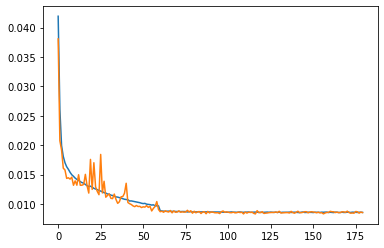

In [6]:
qrnn.save('try/qrnn_gmi_iwp.nc')

fig, ax = plt.subplots(1, 1)
ax.plot(results['training_errors'])
ax.plot(results['validation_errors'])

100%|██████████| 408/408 [00:00<00:00, 1101.61it/s]


Text(0, 0.5, 'Observed frequency')

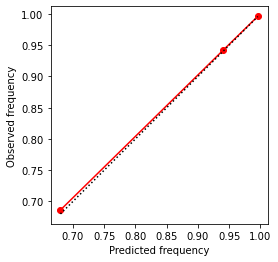

In [7]:
x, y = qrnn.calibration(validation_data)
f, ax = plt.subplots(1, 1)
ax.plot(x, y, marker = "o", c = 'r')
ax.plot(x, x, ls = ":", c = "k")
#ax.set_xlim([0.1, 0.9])
#ax.set_ylim([0.1, 0.9])
ax.set_aspect(1.0)
ax.set_xlabel("Predicted frequency")
ax.set_ylabel("Observed frequency")

408


Text(0.5, 0, 'IWP[kg/m2]')

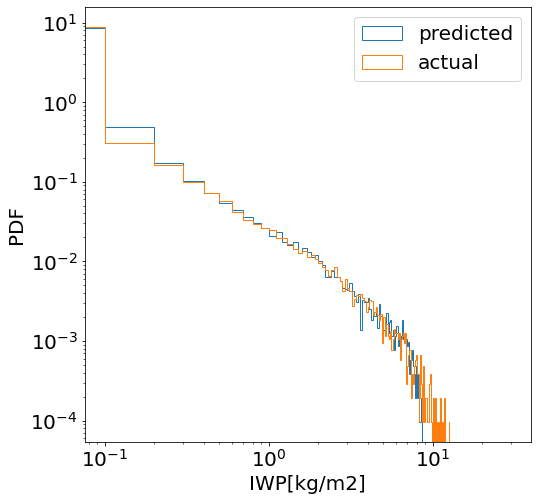

In [8]:

y_pre = []
y = []
y_prior = []
y_pos_mean = []
x_in = []

nbatch = validation_data.__len__()
print (nbatch)
for i in range(nbatch):
    
    xx, yy = validation_data.__getitem__(i)
    
    x = xx.detach().numpy() 

    y_pre.append(qrnn.predict(x)) 
    y_pos_mean.append((qrnn.posterior_mean(x)))
       
    y.append(yy.detach().numpy())
    x_in.append(x)

x_in = np.concatenate(x_in, axis = 0)
y_pre = np.concatenate(y_pre, axis = 0)
y = np.concatenate(y, axis= 0)
y_pos_mean = np.concatenate(y_pos_mean, axis = 0)

plt.rcParams.update({'font.size': 20})
bins1 = np.arange(0, 30, 0.1)
fig, ax = plt.subplots(1, 1, figsize = [8, 8])
ax.hist(y_pos_mean, bins1, density = True , histtype = "step", label = "predicted")


ax.hist(y, bins1, density = True, histtype = "step", label = "actual")
ax.set_yscale('log')
ax.set_xscale('log')

ax.legend()
ax.set_ylabel("PDF")
ax.set_xlabel("IWP[kg/m2]")

/home/inderpreet/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Log scale: values of z <= 0 have been masked
  


Text(0.5, 0, 'IWP Observed [kg/m2]')

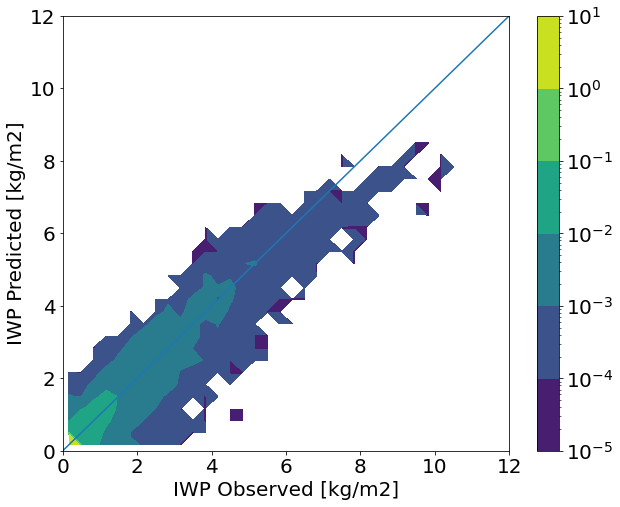

In [9]:
import scipy
from matplotlib import ticker, cm
xyrange = [[0, 15], [0, 15]] # data range

bins = [45, 45] # number of bins
hh, locx, locy = np.histogram2d(y, y_pos_mean, 
                                range=xyrange, bins=bins, density = True)
posx = np.digitize(y, locx)
posy = np.digitize(y_pos_mean, locy)

fig, ax = plt.subplots(1, 1, figsize = [10, 8])
cs = ax.contourf(np.flipud(hh.T),
                extent=np.array(xyrange).flatten(), 
            locator= ticker.LogLocator(), origin='upper')
cbar = fig.colorbar(cs)
ax.set_ylim([0, 12])
ax.set_xlim([0, 12])
xy = np.arange(0, 13, 1)
yy = xy
ax.plot(xy, yy)
ax.set_ylabel("IWP Predicted [kg/m2]")
ax.set_xlabel("IWP Observed [kg/m2]")
#ax.set_yscale('log')
#ax.set_xscale('log')

In [18]:
lat = validation_data.x.shape

AttributeError: 'Subset' object has no attribute 'x'